In [1]:
import numpy as np
from scipy import optimize 
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
m = 1 
v = 10
e = 0.1
t0 = 0.4
t1 = 0.1
k = 0.4
w = 0.5

def utility(c, v, l, e):
    u = np.log(c) - v*(l**(1+1/e)/(1+1/e))
    return u

#1.d. Defining constraints
def constraint(m, l, w, t0, t1, k):
    x = m+w*l-w*l*t0-t1*max((w*l-k),0)
    return x

#1.e. Objective function to minimize
def value_of_choice(l,w,e,v, t0, t1, k):
    c = constraint(m, l, w, t0, t1, k)
    return -utility(c, v, l, e)

#1.f. define a solver
def solver(m, w, e, v, t0, t1, k):
    sol_case1 = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(w,e,v,t0,t1,k))
    l_best = sol_case1.x
    c_best = constraint(m,l_best, w, t0, t1, k)
    u_best = utility(c=c_best, v=v, l=l_best, e=e)
    return l_best, c_best, u_best

l_best, c_best, u_best = solver(m = m, w = w, e = e,v = v,t0 = t0,t1 = t1,k = k)
# f. print resultat

print(f'When optimizing the function we find the optimal labour supply to be {l_best:.3f}' , f'and the optimal consumption {c_best:.3f}' f' which gives us a utility of {u_best:.3f}.')

When optimizing the function we find the optimal labour supply to be 0.691 and the optimal consumption 1.207 which gives us a utility of 0.173.


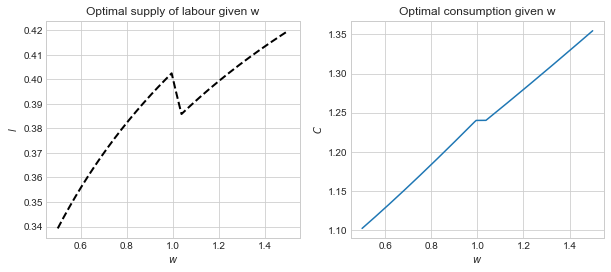

In [3]:
# 2.a. define storage vectors and data for w.
N = 10000
w_vec = np.linspace(0.5, 1.5, N)
l_vec = np.empty(N)
c_vec = np.empty(N)

# 2.b. loop through different w and get optima of l and c for each w in w_vec
for i, w in enumerate(w_vec):
    bundle = solver(w = w,e = 0.3,v = v,t0 = t0,t1 = t1,k = k,m = m)
    l_vec[i] = bundle[0]
    c_vec[i] = bundle[1]

# 2.c. plotting figure.
fig = plt.figure(figsize=(10,4)) # dpi = dots-per-inch (resolution)

ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,ls='--',lw=2,color='black',label='Labour')

#2.c.1 left figure is labour supple
ax_left.set_title('Optimal supply of labour given w')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l$')
ax_left.grid(True)

#2.c.2 right figure is consumption
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given w')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$C$')
ax_right.grid(True)
plt.show()

Sum of the tax revenue: 3196.88


In [9]:
def tax_revenue(w_values,l_vec,tau_0,tau_1,kappa):
    revenue = np.sum(t0*w_vec*l_vec + t1*np.maximum(w_vec*l_vec-k,0))
    return revenue

# Printing the value of the tax revenue
print(f'Sum of the tax revenue: {tax_revenue(w_vec,l_vec,t0,t1,k):.2f}')

Sum of the tax revenue: 1630.19


In [18]:
#We'll start with rewriting task 1 and 2 for e=0.1
e2=0.1

def utility(c, v, l, e2):
    u = np.log(c) - v*(l**(1+1/e2)/(1+1/e2))
    return u

#1.d. Defining constraints
def constraint(m, l, w, t0, t1, k):
    x = m+w*l-w*l*t0-t1*max((w*l-k),0)
    return x

#1.e. Objective function to minimize
def value_of_choice(l,w,e2,v, t0, t1, k):
    c = constraint(m, l, w, t0, t1, k)
    return -utility(c, v, l, e2)

#1.f. define a solver
def solver(m, w, e2, v, t0, t1, k):
    sol_case1 = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(w,e2,v,t0,t1,k))
    l_best = sol_case1.x
    c_best = constraint(m,l_best, w, t0, t1, k)
    u_best = utility(c=c_best, v=v, l=l_best, e2=e2)
    return l_best, c_best, u_best

l_best, c_best, u_best = solver(m = m, w = w, e2 = e2,v = v,t0 = t0,t1 = t1,k = k)

In [19]:
# We'll now calculate the tax revenue for e=0.1
def tax_revenue(w_values,l_vec2,tau_0,tau_1,kappa):
    revenue = np.sum(t0*w_vec*l_vec2 + t1*np.maximum(w_vec*l_vec2-k,0))
    return revenue

# Printing the value of the tax revenue
print(f'Sum of the tax revenue: {tax_revenue(w_vec,l_vec2,t0,t1,k):.2f}')

Sum of the tax revenue: 3196.88


In [17]:
# 5.a. value of choice function to minize
def tax_rev_obj(x): 
    revenue = 0 
    t0 = x[0]
    t1 = x[1]
    k = x[2]
    l_1_values = x[3]
    return -revenue

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x: c_vec-(m+w*x[3]-(x[0]*w*x[3] + (x[1]*np.max(w*x[3]-x[2],0))))}) 
bounds = ((0,1),(0,1),(0,1),(0,1))


# c. call solver
initial_guess = [0.3,0.2,0.5,0.2]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(i),
    method='SLSQP',bounds=bounds,constraints=constraints)

# Print solution 
def print_solution1(t0_best,t1_best,k,l):
    print(f'tax0 = {t0_best:.8f}')
    print(f'tax1 = {t1_best:.8f}')
    print(f'k  = {k:.8f}')
    print(f'l  = {l:.8f}')

# d. unpack solution
t0_best = sol_case2.x[0]
t1_best = sol_case2.x[1]
k = sol_case2.x[2]
l = sol_case2.x[3]
print_solution1(t0_best,t1_best,k,l)

TypeError: value_of_choice() missing 5 required positional arguments: 'e2', 'v', 't0', 't1', and 'k'